In [ ]:
# plan data
# load arrs, pgv4 new
import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np
import os

def load_large_outputs(str_):
    path_ = os.path.dirname(os.getcwd()) + '/sc_project/large_outputs/' # '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

file_ = 'outer_loop_pg_new_v4f_test_07_12-220919.pkl' # 'outer_loop_pg_new_v4f_test_16_11-120608.pkl' # 'outer_loop_pg_new_v4f_test_02_11-183526.pkl' # 'outer_loop_pg_new_v4f_02_11-010356.pkl' # 'outer_loop_pg_new_v4f_test_01_11-135408.pkl' # 'outer_loop_pg_new_v4f_test_01_11-135016.pkl' # 'outer_loop_pg_new_v4f_test_31_10-211852.pkl'
other = load_large_outputs(file_)

## if not test:
# (selected_other,plan_info) = other
# (r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr,vec_ind_arr,act_ind_arr),_ = selected_other
# plan:
# (r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr,vec_ind_arr,act_ind_arr),_ = plan_info['other_']

# if test:
(r_arr_plan,rp_arr_plan,sample_arr_plan,mask_arr_plan,pos_plan_arr_plan,pos_arr_plan,dot_arr_plan,policy_arr_plan,hs_arr_plan,hv_arr_plan,vec_ind_arr_plan,act_ind_arr_plan) = other
print('r_arr.shape=',r_arr_plan.shape,'rp_arr.shape=',rp_arr_plan.shape,'sample_arr.shape=',sample_arr_plan.shape,'mask_arr.shape=',mask_arr_plan.shape,'\n','pos_plan_arr.shape=',pos_plan_arr_plan.shape,'pos_arr.shape=',pos_arr_plan.shape,'dot_arr.shape=',dot_arr_plan.shape,'policy_arr.shape=',policy_arr_plan[0].shape,'\n','hs_arr=',hs_arr_plan.shape,'hv_arr=',hv_arr_plan.shape)
print('r_tot=',np.mean(np.sum(r_arr_plan,axis=1)))
print('plan_rate=',np.sum(sample_arr_plan,axis=None)/np.sum(mask_arr_plan,axis=None))

In [ ]:
# noplan data
# load arrs, pgv4 new 
import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np
import os

def load_large_outputs(str_):
    path_ = os.path.dirname(os.getcwd()) + '/sc_project/large_outputs/' # '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

file_ ='outer_loop_pg_new_v4f_test_07_12-220947.pkl' # 'outer_loop_pg_new_v4f_test_02_11-183559.pkl' # 'outer_loop_pg_new_v4f_test_01_11-135335.pkl' # 'outer_loop_pg_new_v4f_test_01_11-135116.pkl' # 'outer_loop_pg_new_v4f_test_31_10-211936.pkl'
other = load_large_outputs(file_)

## if not test:
# (selected_other,plan_info) = other
# (r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr,vec_ind_arr,act_ind_arr),_ = selected_other
# plan:
# (r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr,vec_ind_arr,act_ind_arr),_ = plan_info['other_']

# if test:
(r_arr_noplan,rp_arr_noplan,sample_arr_noplan,mask_arr_noplan,pos_plan_arr_noplan,pos_arr_noplan,dot_arr_noplan,policy_arr_noplan,hs_arr_noplan,hv_arr_noplan,vec_ind_arr_noplan,act_ind_arr_noplan) = other
# sample_arr_np = jnp.zeros_like(sample_arr_np)
print('r_arr.shape=',r_arr_noplan.shape,'rp_arr.shape=',rp_arr_noplan.shape,'sample_arr.shape=',sample_arr_noplan.shape,'mask_arr.shape=',mask_arr_noplan.shape,'\n','pos_plan_arr.shape=',pos_plan_arr_noplan.shape,'pos_arr.shape=',pos_arr_noplan.shape,'dot_arr.shape=',dot_arr_noplan.shape,'policy_arr.shape=',policy_arr_noplan[0].shape,'\n','hs_arr=',hs_arr_noplan.shape,'hv_arr=',hv_arr_noplan.shape)
print('r_tot=',np.mean(np.sum(r_arr_noplan,axis=1)))
print('plan_rate=',np.sum(sample_arr_noplan,axis=None)/np.sum(mask_arr_noplan,axis=None))

In [ ]:
# compute speed, direction bins

def compute_dot_speed(dot_arr):
    dot_diffs = np.diff(dot_arr, axis=1)
    speed = np.linalg.norm(dot_diffs, axis=2)
    mean_speed = np.mean(speed, axis=1)
    return mean_speed

def compute_dot_direction(dot_arr):
    dot_diffs = np.diff(dot_arr, axis=1)
    mean_dot_dir = np.mean(dot_diffs, axis=1)
    norm_dot_dir = np.linalg.norm(mean_dot_dir, axis=1)
    mean_dot_dir_normalized = mean_dot_dir / norm_dot_dir[:, np.newaxis]
    return mean_dot_dir_normalized

def generate_speed_bins(N, speeds):
    min_speed, max_speed = np.min(speeds), np.max(speeds)
    bins = np.linspace(min_speed, max_speed, N + 1)
    return bins

def generate_bin_vectors(N):
    angles = np.linspace(0, 2 * np.pi, N+1)[:-1]  # Avoiding overlap with 0
    return np.column_stack((np.cos(angles), np.sin(angles)))

def bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction):
    speeds = compute_dot_speed(dot_arr)
    directions = compute_dot_direction(dot_arr)

    speed_bins = generate_speed_bins(N_speed, speeds)
    direction_bins = generate_bin_vectors(N_direction)

    bins = np.zeros((N_speed, N_direction), dtype=object)
    for i in range(N_speed):
        for j in range(N_direction):
            in_speed_bin = (speeds >= speed_bins[i]) & (speeds < speed_bins[i + 1])
            direction_similarity = directions @ direction_bins[j]
            in_direction_bin = direction_similarity > np.cos(np.pi / N_direction)

            # Indices of trials in both speed and direction bins
            bins[i, j] = np.where(in_speed_bin & in_direction_bin)[0]

    return bins

sbins = 3 # 8
abins = 4 # 8

bins = bin_trials_by_speed_and_direction(dot_arr_plan, sbins, abins)

# print(bins[0][0])

In [ ]:
# form matrix of trial-averaged data X[n,t,a,d] (consider with conditional probability analogy)
# objective: X[Ns,T,N] -> X[N,T,A,S]

# reshape, center data X[Ns,T,N] -> X[Ns*T,N]
def bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction):
    speeds = compute_dot_speed(dot_arr)
    directions = compute_dot_direction(dot_arr)

    speed_bins = generate_speed_bins(N_speed, speeds)
    direction_bins = generate_bin_vectors(N_direction)

    bins = np.zeros((N_speed, N_direction), dtype=object)
    for i in range(N_speed):
        for j in range(N_direction):
            in_speed_bin = (speeds >= speed_bins[i]) & (speeds < speed_bins[i + 1])
            direction_similarity = directions @ direction_bins[j]
            in_direction_bin = direction_similarity > np.cos(np.pi / N_direction)
            bins[i, j] = np.where(in_speed_bin & in_direction_bin)[0]

    return bins

def reshape_center(arr):
    Ns,T,N = arr.shape
    arr_reshaped = arr.reshape(-1, N)
    reshaped_centered_arr = arr_reshaped - arr_reshaped.mean(axis=0)
    return reshaped_centered_arr

def marginal_average_t_given_s_a(s,a,trials,neuron_index,data,T, speed_labels, angle_labels):
    if len(trials) == 0:
        print(f'no trials in bin s={s}, a={a}')
        return np.zeros(T)
    Ns = data.shape[0] // T

    marginal_sums = np.zeros(T)
    for trial in trials:
        trial_data = data[trial * T : (trial + 1) * T, neuron_index]
        marginal_sums += trial_data
        assert np.isnan(speed_labels[trial]) or speed_labels[trial] == s, f'speed label {speed_labels[trial]} != {s}'
        assert np.isnan(angle_labels[trial]) or angle_labels[trial] == a, f'angle label {angle_labels[trial]} != {a}'
        speed_labels[trial] = np.int32(s)
        angle_labels[trial] = np.int32(a)
    marginal_average_t = marginal_sums / len(trials)


    return marginal_average_t, speed_labels, angle_labels

def compute_marginals(bins, arr, abins, sbins, Ns, T, N):
    hs_arr_reshaped = reshape_center(arr)

    X_marginals = np.full((N, T, abins, sbins), np.nan)
    X_trial_array = np.full((Ns, N, T, abins, sbins), np.nan)
    speed_labels = np.full((Ns), np.nan)
    angle_labels = np.full((Ns), np.nan)
    for n in range(N):
        for s in range(sbins):
            for a in range(abins):
                trials = bins[s, a]
                X_marginals[n, :, a, s], speed_labels, angle_labels = marginal_average_t_given_s_a(s,a,trials, n, hs_arr_reshaped, T, speed_labels, angle_labels)
    
    for i in range(Ns):
        angle_bin = np.int32(angle_labels[i])
        speed_bin = np.int32(speed_labels[i])
        for n in range(N):
            # print('i',type(i),'n',type(n),'angle_bin',type(angle_bin),'speed_bin',type(speed_bin))
            X_trial_array[i, n, :, angle_bin, speed_bin] = arr[i, :, n]
    return X_marginals, X_trial_array, speed_labels, angle_labels

# label all trials with (t,a,s) information
Ns,T,N = hs_arr_plan.shape
abins = 4 # 8
sbins = 3

hs_arr_reshaped = reshape_center(hs_arr_plan)

bins_s_a = bin_trials_by_speed_and_direction(dot_arr_plan, sbins, abins)
print('bin shape=',bins_s_a.shape)
X_marginal_hs_, X_trial_array_hs_, speed_labels, angle_labels = compute_marginals(bins_s_a, hs_arr_plan, abins, sbins, Ns, T, N)
X_marginal_hs = X_marginal_hs_.transpose(0, 2, 3, 1)
X_trial_array_hs = X_trial_array_hs_.transpose(0, 1, 3, 4, 2)

print(X_marginal_hs.shape)
print(X_trial_array_hs.shape)

In [ ]:
# check for nans......

In [ ]:
# verify marginal array (old)

def verify_marginals(data, bins, T, N, X_marginal):
    # Go through each neuron
    for n in range(N):
        # Go through each angle and stimulus combination
        for a in range(abins):
            for s in range(sbins):
                trials = bins[s][a]
                
                # Skip if there are no trials for this bin
                if len(trials) == 0:
                    continue
                
                # Compute the manual marginal average for this bin
                marginal_sums = np.zeros(T)
                for trial in trials:
                    trial_data = data[trial * T : (trial + 1) * T, n]
                    marginal_sums += trial_data
                manual_marginal_average_t = marginal_sums / len(trials)
                
                # Fetch the marginal from the computed array
                # computed_marginal = X_marginal[n, :, a, s]
                computed_marginal = X_marginal[n, a, s, :]
                
                # Compare the two
                if not np.allclose(manual_marginal_average_t, computed_marginal):
                    print(f"Discrepancy found for neuron {n}, angle {a}, stimulus {s}")
                    return False
    
    # If no discrepancies were found
    print("All verifications passed.")
    return True

verify_marginals(hs_arr_reshaped, bins_s_a, T, N, X_marginal_hs)


In [ ]:
# instantiate dPCA model with labelled parameter axes
# %pylab inline
from numpy import *
from numpy.random import rand, randn, randint
from dPCA import dPCA

# dpca = dPCA.dPCA(n_components=np.int32(2))
# dpca.fit(X_marginal_hs)

dpca = dPCA.dPCA(labels='dst',regularizer='auto',n_components=3) # cant use 'tas' bc of string parsing errors
# dpca = dPCA.dPCA(labels='tas',join={'tas' : ['t','a','s']},regularizer='auto')
# dpca = dPCA.dPCA(labels=3,regularizer='auto')
dpca.protect = ['t']

In [ ]:
# perform dPCA using automatical regularization determination

# %pylab inline
from numpy import *
from numpy.random import rand, randn, randint
from dPCA import dPCA

# X_marginal_hs_reshaped = X_marginal_hs.transpose(0, 2, 3, 1)
# X_trial_array_hs_reshaped = X_trial_array_hs.transpose(0, 1, 3, 4, 2)

X_marginal_hs = np.nan_to_num(X_marginal_hs, nan=0.0)
X_trial_array_hs = np.nan_to_num(X_trial_array_hs, nan=0.0)

Z = dpca.fit_transform(X_marginal_hs,trialX=X_trial_array_hs)

# n_comp=10, optimal_lambda = 0.004743480741674971
# n_comp=5, optimal lambda = 0.006640873038344959

In [ ]:
print('Z.keys()=',Z.keys())

print('Z["d"].shape=',Z['d'].shape)
print('Z["s"].shape=',Z['s'].shape)
print('Z["t"].shape=',Z['t'].shape)
print('Z["ds"].shape=',Z['ds'].shape)

D = dpca.D

print('D.keys=',D.keys())

print('D["d"].shape=',D['d'].shape)


In [ ]:
# direction

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

data = Z['d']
n_comp = 3
abins = 4
sbins = 3

# Setting up the color map for 4 different shades for each of the main colors
colors = ['Reds', 'Greens', 'Blues', 'Purples']
color_maps = [plt.get_cmap(color)(np.linspace(0.5, 1, 3)) for color in colors]

# Plotting the data
fig, axes = plt.subplots(nrows=n_comp, ncols=1, figsize=(10, 15))

for i in range(n_comp):
    ax = axes[i]
    for j in range(abins):
        for k in range(sbins):
            ax.plot(data[i, j, k, :], color=color_maps[j][k], label=f'Direction {j}, Speed {k}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Relative Activity')
    ax.set_title(f'Component {i+1}')
    ax.legend()

# for i in range(n_comp):
#     ax = axes[i]
#     for j in range(abins):
#         ax.plot(np.mean(data[i, j, :,:],axis=0), color=color_maps[j][0], label=f'Angle {j}')
#     ax.set_xlabel('Time')
#     ax.set_ylabel('Relative Activity')
#     ax.set_title(f'Component {i+1}')
#     ax.legend()

fig.suptitle(f'Top {n_comp} Direction Components', fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

In [ ]:
# speed

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

data = Z['s']
n_comp = 3
abins = 4
sbins = 3

# Setting up the color map for 4 different shades for each of the main colors
colors = ['Reds', 'Greens', 'Blues', 'Purples']
color_maps = [plt.get_cmap(color)(np.linspace(0.5, 1, sbins)) for color in colors]

# Plotting the data
fig, axes = plt.subplots(nrows=n_comp, ncols=1, figsize=(10, 15))

for i in range(n_comp):
    ax = axes[i]
    for j in range(abins):
        for k in range(sbins):
            ax.plot(data[i, j, k, :], color=color_maps[j][k], label=f'Direction {j}, Speed {k}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Relative Activity')
    ax.set_title(f'Component {i+1}')
    ax.legend()

# for i in range(n_comp):
#     ax = axes[i]
#     for k in range(sbins):
#         ax.plot(np.mean(data[i, :, k,:],axis=0), color=color_maps[0][k], label=f'Speed {k}')
#     ax.set_xlabel('Time')
#     ax.set_ylabel('Relative Activity')
#     ax.set_title(f'Component {i+1}')
#     ax.legend()

fig.suptitle(f'Top {n_comp} Speed Components', fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

In [ ]:
# time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

data = Z['t']

# Setting up the color map for 4 different shades for each of the main colors
colors = ['Reds', 'Greens', 'Blues', 'Purples']
color_maps = [plt.get_cmap(color)(np.linspace(0.5, 1, 3)) for color in colors]

# Plotting the data
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

for i in range(3):  # First three components
    ax = axes[i]
    for j in range(4):  # Each of the (4) data
        for k in range(3):  # Each of the (3) data, with varying darkness
            ax.plot(data[i, j, k, :], color=color_maps[j][k], label=f'Direction {j}, Speed {k}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Relative Activity')
    ax.set_title(f'Component {i+1}')
    ax.legend()

fig.suptitle('Top 3 Time Components', fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

In [ ]:
# mixing

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

data = Z['ds']

# Setting up the color map for 4 different shades for each of the main colors
colors = ['Reds', 'Greens', 'Blues', 'Purples']
color_maps = [plt.get_cmap(color)(np.linspace(0.5, 1, 3)) for color in colors]

# Plotting the data
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

for i in range(3):  # First three components
    ax = axes[i]
    for j in range(4):  # Each of the (4) data
        for k in range(3):  # Each of the (3) data, with varying darkness
            ax.plot(data[i, j, k, :], color=color_maps[j][k], label=f'Direction {j}, Speed {k}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Relative Activity')
    ax.set_title(f'Component {i+1}')
    ax.legend()

fig.suptitle('Top 3 Mixing Components', fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

In [ ]:
# compute speed, direction bins

def compute_dot_speed(dot_arr):
    dot_diffs = np.diff(dot_arr, axis=1)
    speed = np.linalg.norm(dot_diffs, axis=2)
    mean_speed = np.mean(speed, axis=1)
    return mean_speed

def compute_dot_direction(dot_arr):
    dot_diffs = np.diff(dot_arr, axis=1)
    mean_dot_dir = np.mean(dot_diffs, axis=1)
    norm_dot_dir = np.linalg.norm(mean_dot_dir, axis=1)
    mean_dot_dir_normalized = mean_dot_dir / norm_dot_dir[:, np.newaxis]
    return mean_dot_dir_normalized

def generate_speed_bins(N, speeds):
    min_speed, max_speed = np.min(speeds), np.max(speeds)
    bins = np.linspace(min_speed, max_speed, N + 1)
    return bins

def generate_bin_vectors(N):
    angles = np.linspace(0, 2 * np.pi, N+1)[:-1]  # Avoiding overlap with 0
    return np.column_stack((np.cos(angles), np.sin(angles)))

def bin_trials_by_speed_and_direction(dot_arr, N_speed, N_direction):
    speeds = compute_dot_speed(dot_arr)
    directions = compute_dot_direction(dot_arr)

    speed_bins = generate_speed_bins(N_speed, speeds)
    direction_bins = generate_bin_vectors(N_direction)

    bins = np.zeros((N_speed, N_direction), dtype=object)
    for i in range(N_speed):
        for j in range(N_direction):
            in_speed_bin = (speeds >= speed_bins[i]) & (speeds < speed_bins[i + 1])
            direction_similarity = directions @ direction_bins[j]
            in_direction_bin = direction_similarity > np.cos(np.pi / N_direction)

            # Indices of trials in both speed and direction bins
            bins[i, j] = np.where(in_speed_bin & in_direction_bin)[0]

    return bins

sbins = 3 # 8
abins = 4 # 8

bins = bin_trials_by_speed_and_direction(dot_arr_plan, sbins, abins)

# print(bins[0][0])

In [ ]:
# plot aligned 'plan snippets' across speed bins for plan/no plan cases

B = 3
P = 3

def compute_plan_period_lists(data_plan, data_noplan, sample_arr_vec, B, P, N):
    starting_indices = [i for i in range(1, len(sample_arr_vec)) if sample_arr_vec[i] == 1 and sample_arr_vec[i-1] == 0]
    periods_plan = []
    periods_noplan = []
    
    for index in starting_indices:
        snippet_x1 = np.full((B+P,N), np.nan)
        snippet_x2 = np.full((B+P,N), np.nan)

        num_preceding_zeros = min(B, np.sum(sample_arr_vec[(index - B):index] == 0))
        num_proceeding_ones = min(P, np.sum(sample_arr_vec[index:(index+P)] == 1))

        start_preceding = index - num_preceding_zeros
        snippet_x1[B-num_preceding_zeros:B,:] = data_plan[start_preceding:index,:]
        snippet_x2[B-num_preceding_zeros:B,:] = data_noplan[start_preceding:index,:]

        end_proceeding = index + num_proceeding_ones
        snippet_x1[B:B+num_proceeding_ones,:] = data_plan[index:end_proceeding,:]
        snippet_x2[B:B+num_proceeding_ones,:] = data_noplan[index:end_proceeding,:]

        periods_plan.append(snippet_x1)
        periods_noplan.append(snippet_x2)

    return (periods_plan, periods_noplan)

# def compute_total_binned_plan_periods_given_s_a(bins, h_centered_plan, h_centered_noplan, sample_arr_plan, abins, sbins, Ns, T, N):
def compute_marginals(bins, h_centered_plan, h_centered_noplan, sample_arr_plan, abins, sbins, Ns, T, N, B, P):
    X_marginal_plan = np.full((N, abins, sbins, B+P), np.nan)
    X_marginal_noplan = np.full((N, abins, sbins, B+P), np.nan)
    for s in range(sbins):
        for a in range(abins):
            trials_binned = bins[s, a]
            total_periods_s_a_plan = []
            total_periods_s_a_noplan = []
            for trial in trials_binned:
                trial_data_plan = h_centered_plan[trial * T : (trial + 1) * T, :]
                trial_data_noplan = h_centered_noplan[trial * T : (trial + 1) * T, :]
                periods_plan,periods_noplan = compute_plan_period_lists(trial_data_plan, trial_data_noplan, sample_arr_plan[trial,:], B, P, N)
                # print('periods_plan.shape=',np.array(periods_plan).shape,'periods_noplan.shape=',np.array(periods_noplan).shape)
                total_periods_s_a_plan.append(periods_plan)
                total_periods_s_a_noplan.append(periods_noplan)
            total_periods_s_a_plan_flattened = [arr for sublist in total_periods_s_a_plan for arr in sublist]
            total_periods_s_a_noplan_flattened = [arr for sublist in total_periods_s_a_noplan for arr in sublist]
            array_periods_s_a_plan_flattened = np.array(total_periods_s_a_plan_flattened)
            array_periods_s_a_noplan_flattened = np.array(total_periods_s_a_noplan_flattened)
            print('array_periods_s_a_plan.shape=',array_periods_s_a_plan_flattened.shape,'array_periods_s_a_noplan.shape=',array_periods_s_a_noplan_flattened.shape)
            array_periods_s_a_plan_mean = np.nanmean(np.array(array_periods_s_a_plan_flattened), axis=0)
            array_periods_s_a_noplan_mean = np.nanmean(np.array(array_periods_s_a_noplan_flattened), axis=0)
            print('nan check p/np:',np.isnan(array_periods_s_a_plan_mean).any(),np.isnan(array_periods_s_a_noplan_mean).any())
            for n in range(N):
                X_marginal_plan[n, a, s, :] = array_periods_s_a_plan_mean[:,n]
                X_marginal_noplan[n, a, s, :] = array_periods_s_a_noplan_mean[:,n]
    X_marginal_total = np.stack((X_marginal_noplan, X_marginal_plan), axis=3)
    return X_marginal_total

# def compute_marginals(bins, total_periods_plan, total_periods_noplan, abins, sbins, Ns, T, N, B, P):
#     X_marginal_plan = np.full((N, abins, sbins, B+P), np.nan)
#     X_marginal_noplan = np.full((N, abins, sbins, B+P), np.nan)
#     for n in range(N):
#         for s in range(sbins):
#             for a in range(abins):
#                 periods_plan = total_periods_plan[s*abins+a]
#                 periods_noplan = total_periods_noplan[s*abins+a]
#                 X_marginal_plan[n, a, s, :] = np.nanmean(periods_plan, axis=0)[:,n]
#                 X_marginal_noplan[n, a, s, :] = np.nanmean(periods_noplan, axis=0)[:,n]
#     return X_marginal_plan, X_marginal_noplan

Ns,T,N = hs_arr_plan.shape
abins = 4 # 8
sbins = 3

hs_arr_reshaped_plan = reshape_center(hs_arr_plan)
hs_arr_reshaped_noplan = reshape_center(hs_arr_noplan)

X_marginal_pnp = compute_marginals(bins, hs_arr_reshaped_plan, hs_arr_reshaped_noplan, sample_arr_plan, abins, sbins, Ns, T, N, B, P)

print(X_marginal_pnp.shape)


In [ ]:

# perform dPCA using fixed regularization parameter

ld = 0.005 # 0.006640873038344959
n_comp = 3

dpca_p = dPCA.dPCA(labels='dspt',regularizer=ld,n_components=n_comp) # cant use 'tas' bc of string parsing errors
# dpca = dPCA.dPCA(labels='tas',join={'tas' : ['t','a','s']},regularizer='auto')
# dpca = dPCA.dPCA(labels=3,regularizer='auto')
dpca_p.protect = ['t']

Z_p = dpca_p.fit_transform(X_marginal_pnp) # Z = Z[n_comp,abins,sbins,B+P,2]

print('Z_p.keys()=',Z_p.keys())

print('Z_p["p"].shape=',Z_p['p'].shape)


In [ ]:
# dPCA for top 3 planning components
# 3x3 grid split by speed; top 3 PC's on y axis, 3 speed bins on x axis

import numpy as np
import matplotlib.pyplot as plt

data = Z_p['p']
n_comp, abins, sbins, _, T_ = data.shape
colors = [(0.8, 0.3, 0.3), (0.3, 0.6, 0.3),  (0.3, 0.3, 0.8),  (0.6, 0.3, 0.7)]

def plot_data(data):
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    for i in range(n_comp):
        for j in range(sbins):
            ax = axes[i, j]
            selected_data = data[i, :, j, :, :]
            for k in range(abins):
                ax.plot(selected_data[k, 0, 1:], label=f'angle {k+1}, no plan', linestyle='-', linewidth=2, color=colors[k])
            for k in range(abins):
                ax.plot(selected_data[k, 1, 1:], label=f'angle {k+1}, plan', linestyle='--', linewidth=2, color=colors[k])

            ax.set_title(f'Planning PC {i+1}, Speed bin {j+1}', fontsize=14)
            ax.legend(loc='upper left')
            ax.axvspan(2, 4, color='grey', alpha=0.3)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            if j == 0:
                ax.set_ylabel('Relative Activity', fontsize=14)
            ax.set_xlim(-0.5, T_ - 1.5)
            if i == n_comp - 1:
                ax.set_xticks(range(T_-1))
                ax.set_xticklabels(['', '', 'plan starts', '', ''], fontsize=14)
            else:
                ax.set_xticks([])
                
    plt.suptitle("Top 3 planning PC's, binned by speed - demixed PCA", fontsize=18, y=1.0)
    plt.tight_layout()
    plt.show()

plot_data(data)

In [ ]:
# dPCA for top 3 planning components
# 3x4 grid split by direction; top 3 PC's on y axis, 4 direction bins on x axis

import numpy as np
import matplotlib.pyplot as plt

data = Z_p['p']
n_comp, abins, sbins, _, T_ = data.shape
colors = [(0.8, 0.3, 0.3), (0.3, 0.6, 0.3),  (0.3, 0.3, 0.8),  (0.6, 0.3, 0.7)]

def plot_data(data):
    fig, axes = plt.subplots(3, 4, figsize=(22, 15))
    for i in range(n_comp):
        for j in range(abins):
            ax = axes[i, j]
            selected_data = data[i, j, :, :, :]
            for k in range(sbins):
                ax.plot(selected_data[k, 0, 1:], label=f'speed {k+1}, no plan', linestyle='-', linewidth=2, color=colors[k])
            for k in range(sbins):
                ax.plot(selected_data[k, 1, 1:], label=f'speed {k+1}, plan', linestyle='--', linewidth=2, color=colors[k])

            ax.set_title(f'Planning PC {i+1}, Direction bin {j+1}', fontsize=14)
            ax.legend(loc='upper left')
            ax.axvspan(2, 4, color='grey', alpha=0.3)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            if j == 0:
                ax.set_ylabel('Relative Activity', fontsize=14)
            ax.set_xlim(-0.5, T_ - 1.5)
            if i == n_comp - 1:
                ax.set_xticks(range(T_-1))
                ax.set_xticklabels(['', '', 'plan starts', '', ''], fontsize=14)
            else:
                ax.set_xticks([])

    plt.suptitle("Top 3 planning PC's, binned by direction - demixed PCA", fontsize=20, y=1.0)
    plt.tight_layout()
    plt.show()

plot_data(data)


In [ ]:
# PCA equivalent for comparison

def pca_svd_method(data, K):
    # Reshape the data
    num_samples, T, H = data.shape
    reshaped_data = data.reshape(num_samples*T, H)
    
    # Center the data
    mean_data = np.mean(reshaped_data, axis=0)
    centered_data = reshaped_data - mean_data
    
    # Compute the SVD
    U, S, V = np.linalg.svd(reshaped_data, full_matrices=False)
    
    # Get the top K columns of V
    V_topK = V.T[:, :K]
    
    # Project data onto the top K PCs
    projected_data = reshaped_data @ V_topK
    
    # Reshape the projected data back to [1000, 60, K]
    projected_data = projected_data.reshape(num_samples, T, K)
    
    return projected_data


K = 3

print(X_marginal_pnp.shape)
X_marginal_pnp_reshaped = X_marginal_pnp.reshape(X_marginal_pnp.shape[0],-1,X_marginal_pnp.shape[-1]).transpose(1,2,0) # reshape from 100,4,3,2,6 to 100,4*3*2,6:
print(X_marginal_pnp_reshaped.shape)
X_marginal_pnp_pca = pca_svd_method(X_marginal_pnp_reshaped, K)
print(X_marginal_pnp_pca.shape)
X_marginal_pnp_pca_reshaped_0 = X_marginal_pnp_pca.transpose(2,0,1)
X_marginal_pnp_pca_reshaped_1 = X_marginal_pnp_pca_reshaped_0.reshape(K,X_marginal_pnp.shape[1],X_marginal_pnp.shape[2],X_marginal_pnp.shape[3],X_marginal_pnp.shape[4])
# K,abins,sbins,2,B+P
print(X_marginal_pnp_pca_reshaped_1.shape)

# normal pca...
# hs_arr_total = np.concatenate((hs_arr_plan, hs_arr_noplan), axis=0)
# X_marginal_pnp_pca = pca_svd_method(hs_arr_total, K)
# print(X_marginal_pnp_pca.shape)


In [ ]:
# normal PCA for top 3 planning components
# 3x3 grid split by speed; top 3 PC's on y axis, 3 speed bins on x axis

import numpy as np
import matplotlib.pyplot as plt

data = X_marginal_pnp_pca_reshaped_1
n_comp, abins, sbins, _, T_ = data.shape
colors = [(0.8, 0.3, 0.3), (0.3, 0.6, 0.3),  (0.3, 0.3, 0.8),  (0.6, 0.3, 0.7)]

def plot_data(data):
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    for i in range(n_comp):
        for j in range(sbins):
            ax = axes[i, j]
            selected_data = data[i, :, j, :, :]
            for k in range(abins):
                ax.plot(selected_data[k, 0, 1:], label=f'angle {k+1}, no plan', linestyle='-', linewidth=2, color=colors[k])
            for k in range(abins):
                ax.plot(selected_data[k, 1, 1:], label=f'angle {k+1}, plan', linestyle='--', linewidth=2, color=colors[k])

            ax.set_title(f'Planning PC {i+1}, Speed bin {j+1}', fontsize=14)
            ax.legend(loc='upper left')
            ax.axvspan(2, 4, color='grey', alpha=0.3)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            if j == 0:
                ax.set_ylabel('Relative Activity', fontsize=14)
            ax.set_xlim(-0.5, T_ - 1.5)
            if i == n_comp - 1:
                ax.set_xticks(range(T_-1))
                ax.set_xticklabels(['', '', 'plan starts', '', ''], fontsize=14)
            else:
                ax.set_xticks([])
                
    plt.suptitle("Top 3 planning PC's, binned by speed - PCA", fontsize=18, y=1.0)
    plt.tight_layout()
    plt.show()

plot_data(data)

In [ ]:
# normal PCA for top 3 planning components
# 3x4 grid split by direction; top 3 PC's on y axis, 4 direction bins on x axis

import numpy as np
import matplotlib.pyplot as plt

data = X_marginal_pnp_pca_reshaped_1
n_comp, abins, sbins, _, T_ = data.shape
colors = [(0.8, 0.3, 0.3), (0.3, 0.6, 0.3),  (0.3, 0.3, 0.8),  (0.6, 0.3, 0.7)]

def plot_data(data):
    fig, axes = plt.subplots(3, 4, figsize=(22, 15))
    for i in range(n_comp):
        for j in range(abins):
            ax = axes[i, j]
            selected_data = data[i, j, :, :, :]
            for k in range(sbins):
                ax.plot(selected_data[k, 0, 1:], label=f'speed {k+1}, no plan', linestyle='-', linewidth=2, color=colors[k])
            for k in range(sbins):
                ax.plot(selected_data[k, 1, 1:], label=f'speed {k+1}, plan', linestyle='--', linewidth=2, color=colors[k])

            ax.set_title(f'Planning PC {i+1}, Direction bin {j+1}', fontsize=14)
            ax.legend(loc='upper left')
            ax.axvspan(2, 4, color='grey', alpha=0.3)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            if j == 0:
                ax.set_ylabel('Relative Activity', fontsize=14)
            ax.set_xlim(-0.5, T_ - 1.5)
            if i == n_comp - 1:
                ax.set_xticks(range(T_-1))
                ax.set_xticklabels(['', '', 'plan starts', '', ''], fontsize=14)
            else:
                ax.set_xticks([])

    plt.suptitle("Top 3 planning PC's, binned by direction - PCA", fontsize=20, y=1.0)
    plt.tight_layout()
    plt.show()

plot_data(data)


In [ ]:
# PCA vs dPCA for a given speed/angle/PC

import numpy as np
import matplotlib.pyplot as plt


data_dPCA = Z_p['p']
data_PCA = X_marginal_pnp_pca_reshaped_1
n_comp, abins, sbins, _, T_ = data.shape
abin = 2
sbin = 0
pc = 0

colors = [(0.8, 0.3, 0.3), (0.3, 0.6, 0.3)]

def plot_data_single(data_dPCA,data_PCA,abin,sbin,pc):
    fig, axes = plt.figure(figsize=(6, 4)), plt.axes()
    selected_data_dPCA = data_dPCA[pc, abin, sbin, :, :]
    selected_data_PCA = data_PCA[pc, abin, sbin, :, :]
    axes.plot(selected_data_dPCA[0, 1:], label=f'dPCA, plan={0}', linestyle='-', linewidth=2, color=colors[0])
    axes.plot(selected_data_dPCA[1, 1:], label=f'dPCA, plan={1}', linestyle='--', linewidth=2, color=colors[0])
    axes.plot(selected_data_PCA[0, 1:], label=f'PCA, plan={0}', linestyle='-', linewidth=2, color=colors[1])
    axes.plot(selected_data_PCA[1, 1:], label=f'PCA, plan={1}', linestyle='--', linewidth=2, color=colors[1])
    # axes.set_title(f'dPCA vs PCA, Plan PC {pc+1}, Angle {abin+1}, Speed {sbin+1}', fontsize=14)
    axes.legend(loc='upper left')
    axes.axvspan(2, 4, color='grey', alpha=0.3)
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.set_ylabel('Relative Activity', fontsize=14)
    axes.set_xlim(-0.5, T_ - 1.5)
    axes.set_xticks(range(T_-1))
    axes.set_xticklabels(['', '', 'plan starts', '', ''], fontsize=14)

    plt.suptitle(f'dPCA vs PCA, Plan PC {pc+1}, Angle {abin+1}, Speed {sbin+1}', fontsize=14, y=1)
    plt.tight_layout()
    plt.show()

plot_data_single(data_PCA,data_dPCA,abin,sbin,pc) ##

    # fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    # for i in range(n_comp):
    #     for j in range(sbins):
    #         ax = axes[i, j]
    #         selected_data = data[i, :, j, :, :]
    #         for k in range(abins):
    #             ax.plot(selected_data[k, 0, 1:], label=f'angle {k+1}, no plan', linestyle='-', linewidth=2, color=colors[k])
    #         for k in range(abins):
    #             ax.plot(selected_data[k, 1, 1:], label=f'angle {k+1}, plan', linestyle='--', linewidth=2, color=colors[k])

    #         ax.set_title(f'Planning PC {i+1}, Speed bin {j+1}', fontsize=14)
    #         ax.legend(loc='upper left')
    #         ax.axvspan(2, 4, color='grey', alpha=0.3)
    #         ax.spines['right'].set_visible(False)
    #         ax.spines['top'].set_visible(False)

    #         if j == 0:
    #             ax.set_ylabel('Relative Activity', fontsize=14)
    #         ax.set_xlim(-0.5, T_ - 1.5)
    #         if i == n_comp - 1:
    #             ax.set_xticks(range(T_-1))
    #             ax.set_xticklabels(['', '', 'plan starts', '', ''], fontsize=14)
    #         else:
    #             ax.set_xticks([])
                
    # plt.suptitle("Top 3 planning PC's, binned by speed - PCA", fontsize=18, y=1.0)
    # plt.tight_layout()
    # plt.show()

In [ ]:
# plot varying speed bin in colour (3d, old)
# 3d space where x=time, y=firing rate, z=direction bin

# %matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'data' is your (10,8,3,60) numpy array
data = X_marginal_hs_reshaped

# We will plot the first component, so we select it
first_component = data[0]  # This will have shape (8,3,60)

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Time points
time = np.arange(T)

# Speed is represented by different colors
colors = ['r', 'g', 'b']  # Let's say red, green, blue for the three different speeds

# Plot each line with a different color
for i in range(first_component.shape[1]):  # Iterate over the 'speed' dimension (3)
    for j in range(first_component.shape[0]):  # Iterate over the 'direction' dimension (8)
        # Plotting the line with time on x-axis, 'directions' as y and the values as z
        ax.plot(time, np.full_like(time, j), first_component[j, i, :], color=colors[i])

# Set the labels for the axes
ax.set_xlabel('Time')
ax.set_ylabel('Direction')
ax.set_zlabel('Output')

# Optionally, set the range for y-axis if you want specific ticks for 'direction'
ax.set_yticks(range(first_component.shape[0]))

# Show the plot
plt.show()

In [ ]:
# dpca for plan/distance
# X[Ns,T,N] -> X_marginal[N,D,P]

def calculate_relative_distance(a, b):
    # d = np.abs(mod_(a - b))
    d = np.pi - np.abs(np.pi - np.abs(a - b) % (2*np.pi))
    return np.linalg.norm(d)

hs_arr_plan.shape
hs_arr_noplan.shape

pos_arr_plan
pos_arr_noplan

dot_arr_plan
dot_arr_noplan

Ns,T,N = hs_arr_plan.shape
D=20

# bin all timesteps by distance
# X[Ns,T,N] -> X_marginal[N,T,D]
# for each Ns*T timestep, compute distance to target and hence t,d bin; label with t,d st each Ns*T has a t,d label

# plan

# Compute relative distances
# relative_distances = np.array([[calculate_relative_distance(dot_arr_plan[ns,t,:], pos_arr_plan[ns,t,:]) for t in range(T)] for ns in range(Ns)])
# print(relative_distances.shape)

# Bin the distance values
# distance_bins = np.linspace(relative_distances.min(), relative_distances.max(), D+1)
# digitized = np.digitize(relative_distances, distance_bins) - 1  # Bins as integers from 0 to D-1
# print(digitized.shape)

# Average over corresponding labels
# final_array = np.zeros((N, T, D))
# for t in range(T):
#     for d in range(D):
#         indices = np.where(digitized[:, t] == d)[0]
#         if len(indices) > 0:
#             final_array[:, t, d] = hs_arr_plan[indices, t, :].mean()
# print(final_array.shape)

# noplan

# Compute relative distances
relative_distances_np = np.array([[calculate_relative_distance(dot_arr_noplan[ns,t,:], pos_arr_noplan[ns,t,:]) for t in range(T)] for ns in range(Ns)])
print(relative_distances_np.shape)

# Bin the distance values
distance_bins_np = np.linspace(relative_distances_np.min(), relative_distances_np.max(), D+1)
digitized_np = np.digitize(relative_distances_np, distance_bins_np) - 1  # Bins as integers from 0 to D-1
print(digitized_np.shape)

# Average over corresponding labels
final_array_np = np.zeros((N, T, D))
for t in range(T):
    for d in range(D):
        indices = np.where(digitized_np[:, t] == d)[0]
        if len(indices) > 0:
            final_array_np[:, t, d] = hs_arr_noplan[indices, t, :].mean()
print(final_array_np.shape)

# cat plan/noplan
# X_marginal[N,T,D,P]

final_array_tot = np.stack((final_array, final_array_np), axis=-1)
print(final_array_tot.shape)


In [ ]:
X_marginal_hs = final_array_tot - final_array_tot.mean(axis=(1,2),keepdims=True)
print(X_marginal_hs.shape)

In [ ]:
dpca = dPCA.dPCA(labels='tdp',regularizer=0.001,n_components=3) # cant use 'tas' bc of string parsing errors
# dpca = dPCA.dPCA(labels='tas',join={'tas' : ['t','a','s']},regularizer='auto')
# dpca = dPCA.dPCA(labels=3,regularizer='auto')
dpca.protect = ['t']

Z = dpca.fit_transform(X_marginal_hs)

In [ ]:
print('Z.keys()=',Z.keys())

print('Z["t"].shape=',Z['t'].shape)
print('Z["d"].shape=',Z['d'].shape)
print('Z["p"].shape=',Z['p'].shape)
# print('Z["dp"].shape=',Z['dp'].shape)

D = dpca.D

print('D.keys=',D.keys())
print('D["t"].shape=',D['t'].shape)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

distance_dpc_1 = D['d'][:,0]
plan_dpc_1 = D['p'][:,0]
data = hs_arr_plan

# Example data and dPCs
Ns, T, N = hs_arr_plan.shape

# Stack the dPCs to form a 2xN matrix
dpc_matrix = np.vstack([distance_dpc_1, plan_dpc_1])  # shape: [2, N]

# Project data onto the stacked dPCs
# Reshape data to 2D (Ns*T, N) for matrix multiplication, then reshape back to 3D
projected_data = np.dot(data.reshape(-1, N), dpc_matrix.T).reshape(Ns, T, 2)  # shape: [Ns, T, 2]

# Average projections across trials
avg_projection = np.mean(projected_data, axis=0)  # shape: [T, 2]

# Create colormap (blue to red)
cmap = LinearSegmentedColormap.from_list('blue_to_red', ['blue', 'red'], N=T)

# Phase plane plot
plt.figure(figsize=(8, 6))
sc = plt.scatter(avg_projection[:, 0], avg_projection[:, 1], c=range(T), cmap=cmap)
plt.colorbar(sc, label='Time')
plt.xlabel('Distance dPC Projection')
plt.ylabel('Plan dPC Projection')
plt.title('Phase Plane Analysis')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection

distance_dpc_1 = D['d'][:,0]
plan_dpc_1 = D['p'][:,0]
data = hs_arr_plan

# Example data and dPCs
Ns, T, N = hs_arr_plan.shape

# Stack the dPCs to form a 2xN matrix
dpc_matrix = np.vstack([distance_dpc_1, plan_dpc_1])  # shape: [2, N]

# Project data onto the stacked dPCs
# Reshape data to 2D (Ns*T, N) for matrix multiplication, then reshape back to 3D
projected_data = np.dot(data.reshape(-1, N), dpc_matrix.T).reshape(Ns, T, 2)  # shape: [Ns, T, 2]

# Average projections across trials
avg_projection = np.mean(projected_data, axis=0)  # shape: [T, 2]

# Create a continuous line with changing color
points = avg_projection.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a colormap (blue to red)
cmap = LinearSegmentedColormap.from_list('blue_to_red', ['blue', 'red'], N=T)

# Create a LineCollection from the segments
lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, T-1))
lc.set_array(np.arange(T))  # Set the colors according to time
lc.set_linewidth(3)

fig, ax = plt.subplots(figsize=(8, 6))
ax.add_collection(lc)
ax.autoscale()
ax.set_xlabel('Distance dPC Projection')
ax.set_ylabel('Plan dPC Projection')
ax.set_title('Phase Plane Analysis with Color Gradient')

# Creating a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.set_label('Time')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection

k = 12

distance_dpc_1 = D['d'][:,0]
plan_dpc_1 = D['p'][:,0]
data = hs_arr_plan

Ns, T, N = hs_arr_plan.shape

dpc_matrix = np.vstack([distance_dpc_1, plan_dpc_1])  # shape: [2, N]
projected_data = np.dot(data.reshape(-1, N), dpc_matrix.T).reshape(Ns, T, 2)  # shape: [Ns, T, 2]
projection_k = projected_data[k,:,:]

points = projection_k.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

cmap = LinearSegmentedColormap.from_list('blue_to_red', ['blue', 'red'], N=T)

lc = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, T-1))
lc.set_array(np.arange(T))  # Set the colors according to time
lc.set_linewidth(3)
fig, ax = plt.subplots(figsize=(8, 6))
ax.add_collection(lc)
ax.autoscale()
ax.set_xlabel('Distance dPC Projection')
ax.set_ylabel('Plan dPC Projection')
ax.set_title('Phase Plane Analysis with Color Gradient')

# Creating a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.set_label('Time')

plt.show()

In [ ]:
k=6
print(sample_arr_plan[k,:])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection


k = 615
distance_dpc_1 = D['d'][:,0]
distance_dpc_2 = D['d'][:,1]
plan_dpc_1 = D['p'][:,0]
plan_dpc_2 = D['p'][:,1]
data = hs_arr_plan
sample_arr_k = sample_arr_plan[k,:]  # Replace with your actual sample_arr with shape (60,)

Ns, T, N = data.shape
dpc_matrix = np.vstack([distance_dpc_1, plan_dpc_1])

projected_data = np.dot(data.reshape(-1, N), dpc_matrix.T).reshape(Ns, T, 2)
projection_k = projected_data[k,:,:]

points = avg_projection.reshape(-1, 1, 2)
# points = projection_k.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

lc_regular = LineCollection(segments, cmap='coolwarm', norm=plt.Normalize(0, T-1))
lc_regular.set_array(np.arange(T-1)[sample_arr_k[:-1] == 0])
lc_regular.set_linewidth(3)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.add_collection(lc_regular)
ax.autoscale()
ax.set_xlabel('Distance dPC Projection')
ax.set_ylabel('Plan dPC Projection')
ax.set_title('Phase Plane Analysis with Black Lines at Specific Times')

# Creating a colorbar for the regular segments
cbar = plt.colorbar(lc_regular, ax=ax)
cbar.set_label('Time')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Assuming the following variables are defined and correctly initialized:
# distance_dpc_1, plan_dpc_1, data, sample_arr_k
# Ns, T, N = data.shape
# dpc_matrix = np.vstack([distance_dpc_1, plan_dpc_1])

projected_data = np.dot(data.reshape(-1, N), dpc_matrix.T).reshape(Ns, T, 2)

k = 588  # Make sure k is correctly defined and within the range of Ns
projection_k = projected_data[k, :, :]
sample_arr_k = sample_arr_plan[k, :]
print(sample_arr_k)

points = projection_k.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

colors = np.linspace(0, 1, T)
cmap = plt.get_cmap('coolwarm')
lc_regular = LineCollection(segments, cmap=cmap, norm=plt.Normalize(0, 1))
lc_regular.set_array(colors)
lc_regular.set_linewidth(3)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.add_collection(lc_regular)

# Identify black segments using np.diff
change_points = np.diff(sample_arr_k, prepend=0, append=0)
start_points = np.where(change_points == 1)[0]
end_points = np.where(change_points == -1)[0]

# Plot black dots at the start of each plan
for start in start_points:
    ax.scatter(projection_k[start, 0], projection_k[start, 1], color='black', s=50)

# Plot each black segment
for start, end in zip(start_points, end_points):
    segment_points = projection_k[start:end]
    # print(segment_points)
    ax.plot(segment_points[:, 0], segment_points[:, 1], color='black', linewidth=3)
    # ax.scatter(segme /nt_points[:, 0], segment_points[:, 1], color='black')

ax.autoscale()
ax.set_xlabel('Distance dPC Projection')
ax.set_ylabel('Plan dPC Projection')
ax.set_title('Phase Plane Analysis with Black Segments')

# Creating a colorbar for the regular segments
cbar = plt.colorbar(lc_regular, ax=ax)
cbar.set_label('Time')

plt.show()

In [ ]:
sample_arr_sorted = np.argsort(np.sum(sample_arr_plan,axis=1))[::-1]
print('sample_arr_sorted=',sample_arr_sorted[:10])

# print(sample_arr_plan[133])
print(sample_arr_plan[615])

In [ ]:
print(np.dot(distance_dpc_1,distance_dpc_2))

In [ ]:
# def compute_plan_period_lists(data_plan, data_noplan, sample_arr_vec, B, P, N):
#     starting_indices = [i for i in range(1, len(sample_arr_vec)) if sample_arr_vec[i] == 1 and sample_arr_vec[i-1] == 0]
#     periods_plan = []
#     periods_noplan = []
    
#     for index in starting_indices:
#         snippet_x1 = np.full((B+P,N), np.nan)
#         snippet_x2 = np.full((B+P,N), np.nan)

#         num_preceding_zeros = min(B, np.sum(sample_arr_vec[(index - B):index] == 0))
#         num_proceeding_ones = min(P, np.sum(sample_arr_vec[index:(index+P)] == 1))

#         start_preceding = index - num_preceding_zeros
#         snippet_x1[B-num_preceding_zeros:B,:] = data_plan[start_preceding:index,:]
#         snippet_x2[B-num_preceding_zeros:B,:] = data_noplan[start_preceding:index,:]

#         end_proceeding = index + num_proceeding_ones
#         snippet_x1[B:B+num_proceeding_ones,:] = data_plan[index:end_proceeding,:]
#         snippet_x2[B:B+num_proceeding_ones,:] = data_noplan[index:end_proceeding,:]

#         periods_plan.append(snippet_x1)
#         periods_noplan.append(snippet_x2)

#     return periods_plan # (periods_plan, periods_noplan)

def compute_plan_period_lists(data_plan, data_noplan, sample_arr_vec, B, P, N):
    # Identify starting indices of planning periods
    starting_indices = [i for i in range(1, len(sample_arr_vec)) if sample_arr_vec[i] == 1 and sample_arr_vec[i-1] == 0]

    # Initialize lists to store snippets
    periods_plan = []
    periods_noplan = []
    
    for index in starting_indices:
        # Ensure the sequence doesn't go out of bounds
        if index + P >= len(sample_arr_vec) or sample_arr_vec[index + P] != 0:
            continue  # Skip if P ones are not followed by a zero or out of bounds

        # Check if there are exactly P ones
        num_proceeding_ones = np.sum(sample_arr_vec[index:(index + P)] == 1)
        if num_proceeding_ones != P:
            continue  # Skip if not exactly P ones

        # Initialize snippets with NaN
        snippet_x1 = np.full((B + P, N), np.nan)
        snippet_x2 = np.full((B + P, N), np.nan)

        # Calculate the number of preceding zeros
        num_preceding_zeros = min(B, np.sum(sample_arr_vec[(index - B):index] == 0))

        # Calculate start and end indices for preceding and proceeding data
        start_preceding = index - num_preceding_zeros
        end_proceeding = index + num_proceeding_ones

        # Fill the snippets with data
        snippet_x1[B - num_preceding_zeros:B, :] = data_plan[start_preceding:index, :]
        snippet_x2[B - num_preceding_zeros:B, :] = data_noplan[start_preceding:index, :]

        snippet_x1[B:B + num_proceeding_ones, :] = data_plan[index:end_proceeding, :]
        snippet_x2[B:B + num_proceeding_ones, :] = data_noplan[index:end_proceeding, :]

        # Append the filled snippets to the lists
        periods_plan.append(snippet_x1)
        periods_noplan.append(snippet_x2)

    return periods_plan #, periods_noplan

B = 4
P = 3
N = 100
k = 133

pp_list_3 = []
pp_list_2 = []
pp_list_1 = []
for n in range(N):
    pp_list_1.append(compute_plan_period_lists(hs_arr_plan[n], hs_arr_noplan[n], sample_arr_plan[n], B, 1, N))
    pp_list_2.append(compute_plan_period_lists(hs_arr_plan[n], hs_arr_noplan[n], sample_arr_plan[n], B, 2, N))
    pp_list_3.append(compute_plan_period_lists(hs_arr_plan[n], hs_arr_noplan[n], sample_arr_plan[n], B, 3, N))

pp_arr_1 = np.array([arr for sublist in pp_list_1 for arr in sublist])
pp_arr_2 = np.array([arr for sublist in pp_list_2 for arr in sublist])
pp_arr_3 = np.array([arr for sublist in pp_list_3 for arr in sublist])
pp_arr_1_mean = np.nanmean(pp_arr_1, axis=0)
pp_arr_2_mean = np.nanmean(pp_arr_2, axis=0)
pp_arr_3_mean = np.nanmean(pp_arr_3, axis=0)
# print(len(pp_list), pp_array.shape)


In [ ]:
print(pp_arr_1_mean.shape, pp_arr_2_mean.shape, pp_arr_3_mean.shape)

In [ ]:
plt.xlabel('rel. distance (rad)', fontsize=fnt)
plt.ylabel('plan density', fontsize=fnt)
# plt.title('Normalized number of plans starting at each relative distance', fontsize=fnt)
plt.xticks(fontsize=fnt)
plt.yticks(fontsize=fnt)
plt.legend(fontsize=34, loc='upper right', frameon=False, bbox_to_anchor=(1.2, 1),handlelength=1.5)
plt.vlines(x=np.pi/2 - 0.15, ymin=0, ymax=0.7, color='grey', linestyle='--', linewidth=lw)

# plt.grid(True)
plt.tight_layout()

# Adjusting Axes and Spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(lw)
ax.spines['bottom'].set_linewidth(lw)
ax.tick_params(axis='both', which='major', labelsize=fnt, length=10, width=lw)
ax.set_xticks([0,np.sqrt(2)*np.pi])
ax.set_xticklabels(['0','$\sqrt{2}\pi$'])
ax.set_yticks([0,0.5])
ax.set_yticklabels(['0','0.5'])

plt.show()

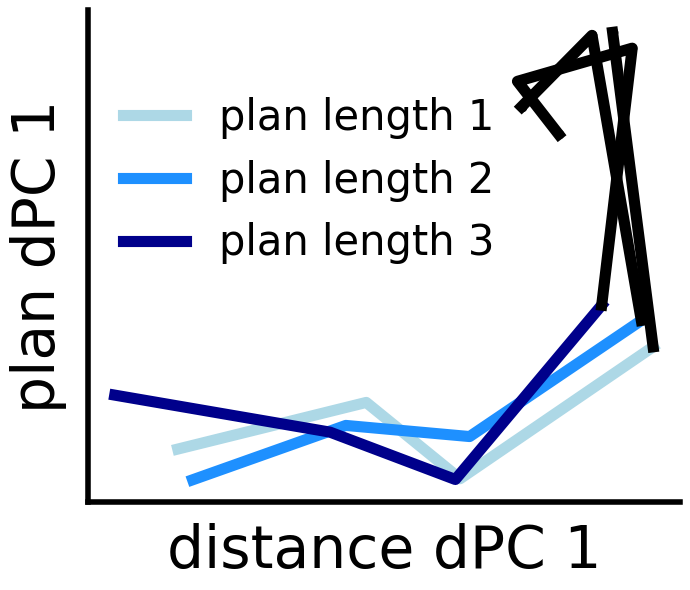

In [120]:
# data_1 = pp_arr_1_mean # 41
# data_2 = pp_arr_2_mean # 42
# data_3 = pp_arr_3_mean # 43

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

B = 4
clrs = ['#ADD8E6', '#1E90FF', '#00008B']
fnt = 42
lw = 4
plw = 8

# # Project the data onto the first two dPCs to get a 6,2 timeseries
# timeseries_2d_1 = np.dot(data_1, dpc_matrix.T)
# timeseries_2d_2 = np.dot(data_2, dpc_matrix.T)
# timeseries_2d_3 = np.dot(data_3, dpc_matrix.T)

timeseries_2d_1 = ts1
timeseries_2d_2 = ts2
timeseries_2d_3 = ts3

# Plotting
fig, ax = plt.subplots(figsize=(7, 6))
# Plot the first three points in blue
# ax.scatter(timeseries_2d_2[:B, 0], timeseries_2d_2[:B, 1], color='red', label='First 3 Points')
# ax.scatter(timeseries_2d_3[:B, 0], timeseries_2d_3[:B, 1], color='magenta', label='First 3 Points')
# ax.scatter(timeseries_2d_1[:B, 0], timeseries_2d_1[:B, 1], color='blue', label='First 3 Points')

# Plot the last three points in black
ax.scatter(timeseries_2d_2[B:, 0], timeseries_2d_2[B:, 1], color='black')
ax.scatter(timeseries_2d_3[B:, 0], timeseries_2d_3[B:, 1], color='black')
ax.scatter(timeseries_2d_1[B:, 0], timeseries_2d_1[B:, 1], color='black')


# Plot lines connecting the points
ax.plot(timeseries_2d_1[:B, 0], timeseries_2d_1[:B, 1], color=clrs[0], linewidth=plw, label='plan length 1')
ax.plot(timeseries_2d_2[:B, 0], timeseries_2d_2[:B, 1], color=clrs[1] , linewidth=plw, label='plan length 2')
ax.plot(timeseries_2d_3[:B, 0], timeseries_2d_3[:B, 1], color=clrs[2], linewidth=plw, label='plan length 3')

ax.plot(timeseries_2d_1[B-1:, 0], timeseries_2d_1[B-1:, 1], color='black', linewidth=plw)
ax.plot(timeseries_2d_2[B-1:, 0], timeseries_2d_2[B-1:, 1], color='black', linewidth=plw)
ax.plot(timeseries_2d_3[B-1:, 0], timeseries_2d_3[B-1:, 1], color='black', linewidth=plw)


# # Setting the same axes as before (assuming the previous range is known)
# ax.set_xlim([-1, 1])  # Set this to your actual previous x-axis range
# ax.set_ylim([-1, 1])  # Set this to your actual previous y-axis range

# Customizing the plot
ax.set_xlabel('distance dPC 1', fontsize=fnt, labelpad=15)
ax.set_ylabel('plan dPC 1', fontsize=fnt, labelpad=15)
ax.legend(fontsize=30, loc='upper right', frameon=False, bbox_to_anchor=(0.75, 0.9), handlelength=1.5)
plt.xticks([],fontsize=fnt)
plt.yticks([],fontsize=fnt)
plt.tight_layout()

# Adjusting Axes and Spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(lw)
ax.spines['bottom'].set_linewidth(lw)
ax.tick_params(axis='both', which='major', labelsize=fnt, length=10, width=lw)

plt.show()

In [115]:
import numpy as np

ts1 = np.array([[ -8.54990263e-02,  3.56572453e-30], [-3.19565069e-02,  4.22027172e-30], [-0.529870189e-02,  3.14950068e-30], [4.954873884e-02,  5.00040070e-30], [3.8047906965e-02,  9.41278238e-30]])
# print(ts1.shape)

ts2 = np.array([[-8.12789880e-02,  3.13454652e-30], [-3.77546014e-02,  3.89743551e-30], [-0.25844573e-02,  3.74126599e-30], [ 4.61985881e-02,  5.37064920e-30], [ 3.21985881e-02,  9.37064920e-30], [ 1.21985881e-02,  8.37064920e-30]])
# print(ts2.shape)

ts3 = np.array([[-10.34154897e-02,  4.32269991e-30], [-4.22646493e-02,  3.803584003e-30], [-0.66326136e-02,  3.13871908e-30], [3.49478563e-02,  5.58516419e-30], [4.36120096e-02,  9.19102382e-30], [ 1.101191060e-02,  8.72579967e-30], [ 2.272412379e-02,  7.98261540e-30]])

In [ ]:
from dPCA import dPCA

labels = 'td'

# Assuming dpca.explained_variance_ratio_ is a dictionary
variance_ratios = dpca.explained_variance_ratio_

# Calculate total variance
total_variance = sum(sum(v) for v in variance_ratios.values())

# Calculate variance explained for each factor
variance_explained = {}
for factor, variances in variance_ratios.items():
    variance_explained[factor] = np.array(variances) / total_variance

# Print variance explained for each dPC of each factor
for factor, variances in variance_explained.items():
    for i, variance in enumerate(variances):
        print(f"Variance explained by dPC{i+1} for {factor}: {variance}")



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.colors import to_rgba
from matplotlib.lines import Line2D

%matplotlib qt

def plot_trajectories(fig, data1, data2, sample_arr_plan, sample_arr_noplan, n_list):
    colors = ['#1f77b4', '#ff7f0e']  # Define two distinct colors for the two data sets
    colors = ['#ADD8E6','#00008B']
    
    ax1 = fig.add_subplot(121, projection='3d')
    
    # Function to plot a single trajectory
    def plot_single_trajectory(data, color, n, sample_arr):
        traj = data[n, :, :3]
        length = traj.shape[0]
        # length = 15
        
        transitions = np.where(np.diff(sample_arr[n, :]) != 0)[0]
        print('tr=',transitions)
        
        if sample_arr[n, 0] == 1:
            transitions = np.insert(transitions, 0, -1)
        if sample_arr[n, -1] == 1:
            transitions = np.append(transitions, length-2)
        
        color_rgba = to_rgba(color, alpha=.8)  # Convert hex color to RGBA
        black_rgba = (0, 0, 0, 1)  # Black in RGBA

        # Use constant color for the trajectory
        colors = np.array([color_rgba if sample_arr[n, i] == 0 else black_rgba for i in range(length)])
        
        segments_3d = [traj[i:i+2] for i in range(length-1)]
        print('seg=',segments_3d)
        lc_3d = Line3DCollection(segments_3d, colors=colors[:-1], linewidths=2)
        ax1.add_collection(lc_3d)

        # Adding dots for transitions
        for t in transitions:
            ax1.scatter(*traj[t+1, :3], color='black', s=10)

    # Plot trajectories for both data arrays
    for idx, n in enumerate(n_list):
        plot_single_trajectory(data2[:,b:l,:], colors[1], n, sample_arr_noplan[:,b:l])
        plot_single_trajectory(data1[:,b:l,:], colors[0], n, sample_arr_plan[:,b:l])

    # Set limits based on data1 and data2
    all_data = np.concatenate([data1[:, :, :3].reshape(-1, 3), data2[:, :, :3].reshape(-1, 3)], axis=0)
    ax1.set_xlim(all_data[:, 0].min(), all_data[:, 0].max())
    ax1.set_ylim(all_data[:, 1].min(), all_data[:, 1].max())
    ax1.set_zlim(all_data[:, 2].min(), all_data[:, 2].max())

    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    # ax2.set_title('2D Projections of Average Trajectories by Dot Speed')
    # ax2.set_xlabel('PC1')
    # ax2.set_ylabel('PC2')

    ax1.set_xlabel('PC1', fontsize=fnt, labelpad=-5, rotation=0)
    ax1.set_xticks([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_linewidth(4)
    ax1.spines['bottom'].set_linewidth(4)
    # ax1.xaxis.pane.fill = False
    ax1.set_ylabel('PC2', fontsize=fnt, labelpad=-0, rotation=0)
    ax1.set_yticks([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_linewidth(4)
    ax1.spines['bottom'].set_linewidth(4)
    ax1.set_zlabel('PC3', fontsize=fnt, labelpad=-5, rotation=90)
    ax1.set_zticks([])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_linewidth(4)
    ax1.spines['bottom'].set_linewidth(4)
    ax1.grid(False)

    # Create custom legend items
    legend_elements = [
        Line2D([0], [0], color=[0.30705882352941175, 0.508235294117647, 0.7719999999999999, 0.8]
, lw=4, label='combined'),
        Line2D([0], [0], color=to_rgba('#00008B', alpha=.8), lw=4, label='no plan'),
        Line2D([0], [0], color='black', lw=4, label='plan')
    ]

    ax1.legend(handles=legend_elements, loc="upper center", ncol=3, fontsize=15, frameon=False, handlelength=1.4, columnspacing=0.5, bbox_to_anchor=(0.52, .9))
    
    plt.show()

b=12
l = 18
fnt = 30

fig = plt.figure(figsize=(12, 6))
n_list = [588] # Example indices
# Replace hs_arr_plan and hs_arr_noplan with your actual data arrays
plot_trajectories(fig, hs_arr_plan, hs_arr_noplan, sample_arr_plan, sample_arr_noplan, n_list)
